## Goal is to predict TenYearCHD AKA 10 year risk of for coronary hear disease

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
 
%matplotlib inline

In [121]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [122]:
HEART_DISEASE_PATH = "/content/heartdisease.csv"
df = pd.read_csv(HEART_DISEASE_PATH)
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [124]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [125]:
#dropping all of the null vals
df.dropna(how="any", inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc819a8f5c0>,
      dtype=object)

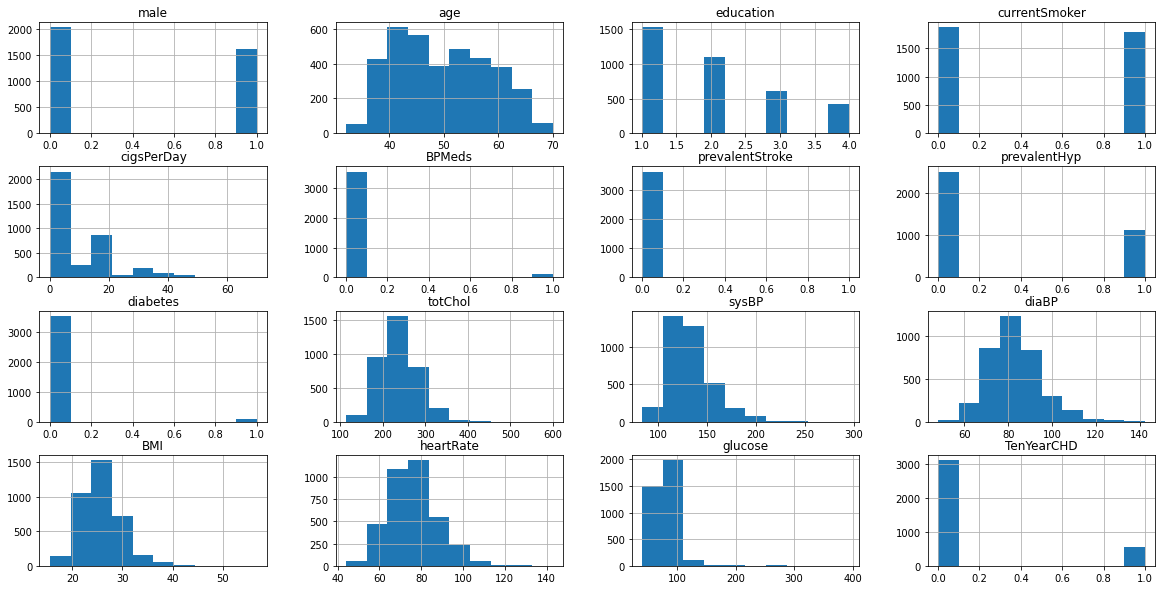

In [126]:
df.hist()

In [127]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,3656.0,0.443654,0.496883,0.00,0.00,0.00,1.00,1.0
age,3656.0,49.557440,8.561133,32.00,42.00,49.00,56.00,70.0
education,3656.0,1.979759,1.022657,1.00,1.00,2.00,3.00,4.0
currentSmoker,3656.0,0.489059,0.499949,0.00,0.00,0.00,1.00,1.0
cigsPerDay,3656.0,9.022155,11.918869,0.00,0.00,0.00,20.00,70.0
BPMeds,3656.0,0.030361,0.171602,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3656.0,0.005744,0.075581,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3656.0,0.311543,0.463187,0.00,0.00,0.00,1.00,1.0
diabetes,3656.0,0.027079,0.162335,0.00,0.00,0.00,0.00,1.0
totChol,3656.0,236.873085,44.096223,113.00,206.00,234.00,263.25,600.0


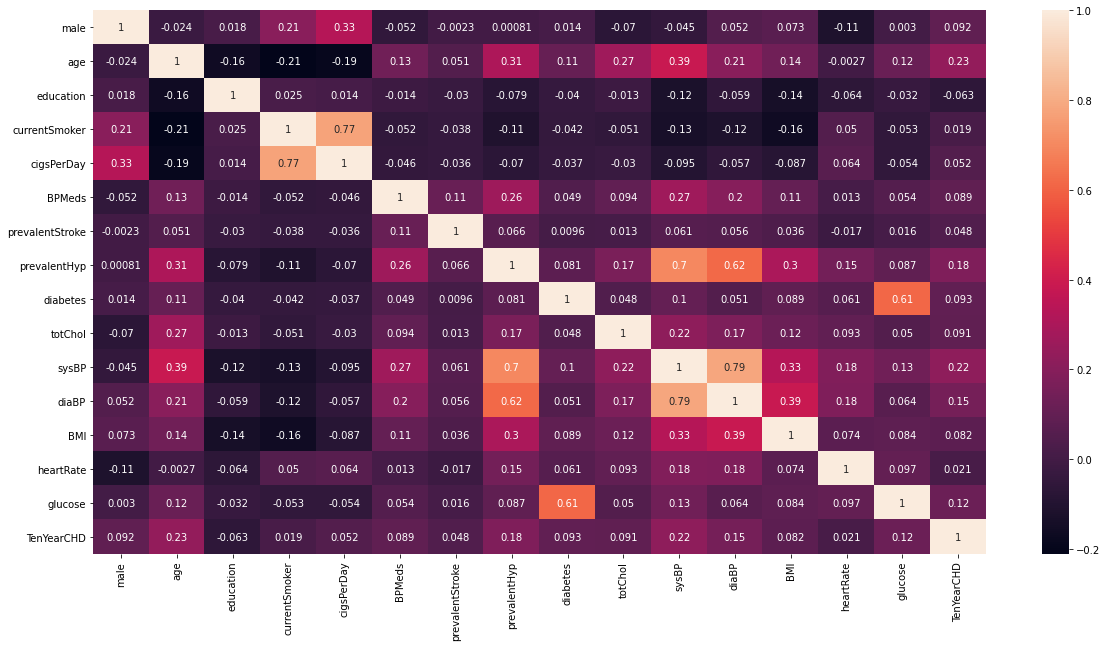

In [128]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [129]:
# splitting data set
train_set = df.sample(frac=0.8, random_state=0)
test_set = df.drop(train_set.index)

y_train = train_set.pop("TenYearCHD")
x_train = train_set

y_test = test_set.pop("TenYearCHD")
x_test = test_set

# Normalising values
def normalise_vals(arr):
    arr = arr - arr.mean(axis=0)
    arr = arr / np.abs(arr).max(axis=0)
    return arr

x_train, x_test = normalise_vals(x_train), normalise_vals(x_test)

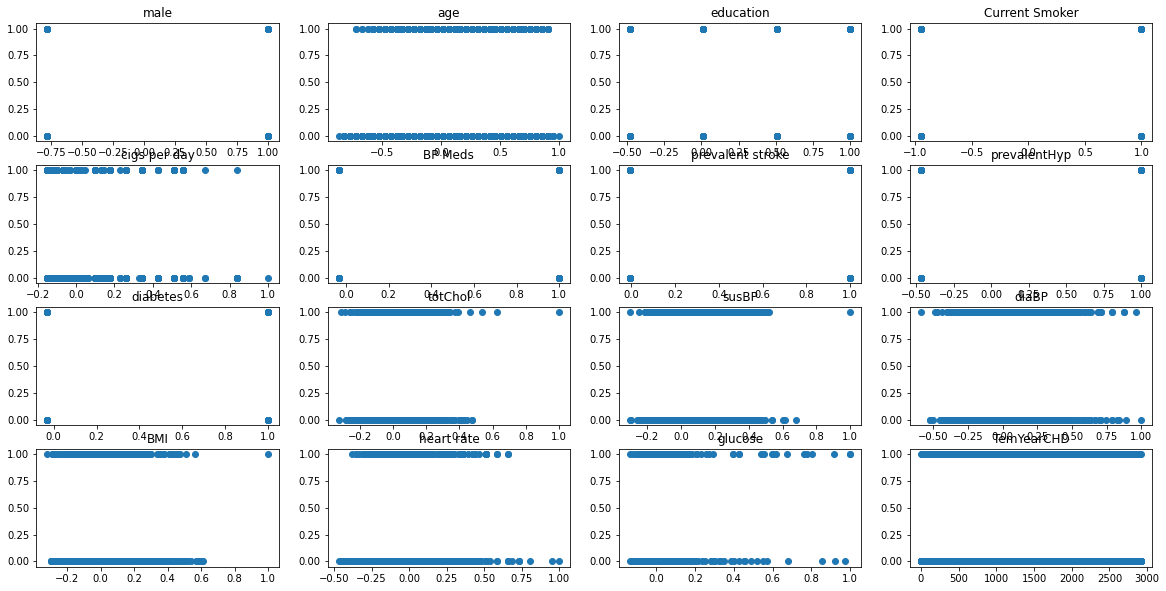

In [130]:
fig, ax = plt.subplots(4,4)
(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16) = ax

def plot_against_10CHD(axis, param, title):
    axis.scatter(param, y_train)
    axis.title.set_text(title)

plot_against_10CHD(ax1, x_train["male"], "male")
plot_against_10CHD(ax2, x_train["age"], "age")
plot_against_10CHD(ax3, x_train["education"], "education")
plot_against_10CHD(ax4, x_train["currentSmoker"], "Current Smoker")
plot_against_10CHD(ax5, x_train["cigsPerDay"], "cigs per day")
plot_against_10CHD(ax6, x_train["BPMeds"], "BP Meds")
plot_against_10CHD(ax7, x_train["prevalentStroke"], "prevalent stroke")
plot_against_10CHD(ax8, x_train["prevalentHyp"], "prevalentHyp")
plot_against_10CHD(ax9, x_train["diabetes"], "diabetes")
plot_against_10CHD(ax10, x_train["totChol"], "totChol")
plot_against_10CHD(ax11, x_train["sysBP"], "susBP")
plot_against_10CHD(ax12, x_train["diaBP"], "diaBP")
plot_against_10CHD(ax13, x_train["BMI"], "BMI")
plot_against_10CHD(ax14, x_train["heartRate"], "heart rate")
plot_against_10CHD(ax15, x_train["glucose"], "glucose")
plot_against_10CHD(ax16, [x for x in range(len(y_train))], "TemYearCHD")

plt.show()

In [131]:
x_train, x_test = x_train.to_numpy(), x_test.to_numpy()
x_test.shape, x_train.shape

((731, 15), (2925, 15))

# Logistic regression from scratch

In [132]:
class MyLogisticRegression:
    """
    Sigmoid function
        s(x) = 1 / (1 + e^-x)
        y predictions = s(f(w,b)) = 1 / (1 + e^(-wx+b))
        outputs a probability b/w 0 - 1

    Cost function (cross entropy)
        J(w,b) = (Y)(-log(y_pred)) + (1-Y)(-log(1 - y_pred))

        # 2 can be ignored for both as its just a scaling factor
        dJ/dw = 1/N sum(2 * xi * (y_pred - y_i))
        dJ/db = 1/N sum(2 (y_pred - y_i))

    Updating weights
        weight = w - lr * dw
        bias = b - lr * db
    """
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def forward_prop(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        z = 1 / (1 + np.exp(-linear_model))
        return z

    def back_prop(self, X, y, z, lr, n):
        dw = (1 / n) * np.dot(X.T, (z - y))
        db = (1 / n) * np.sum(z - y)

        #updating
        self.weights -= lr * dw
        self.bias -= lr * db

    def cost_func(self, X, y, z):
        p1 = y * (-1 * np.log(z))
        p2 = (1 - y) * (-1 * np.log(1 - z))
        return np.sum(p1 + p2)
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        z = 1 / (1 + np.exp(-linear_model))
        y_pred_classes = [1 if i > 0.5 else 0 for i in z]
        return y_pred_classes
        
    
    def fit(self, x_train, y_train, x_test, y_test, epochs, lr):
        train_samples_size, train_features_size =  x_train.shape

        self.weights = np.random.randn(train_features_size)
        self.bias = 0

        TEST_COST, TRAIN_COST = [], []

        for epoch in range(1, epochs + 1):
            z_train = self.forward_prop(x_train)
            cost_train = self.cost_func(x_train, y_train, z_train)
            TRAIN_COST.append(cost_train)
            self.back_prop(x_train, y_train, z_train, lr, train_samples_size)

            z_test = self.forward_prop(x_test)
            cost_test = self.cost_func(x_test, y_test, z_test)
            TEST_COST.append(cost_test)

            if epochs % 50 == 0:
                print(f"EPOCHS {epoch} / {epochs} || TRAIN COST {cost_train} || TEST COST {cost_test}")

        # plotting graph
        fig, ax = plt.subplots()
        
        ax.plot(TRAIN_COST)
        ax.scatter([x for x in range(len(TRAIN_COST))], TRAIN_COST, label="train_set")
        ax.scatter([x for x in range(len(TEST_COST))], TEST_COST, label="test_set")
        ax.plot(TEST_COST)
        ax.title.set_text('Cost')
        ax.legend()

Streaming output truncated to the last 5000 lines.
EPOCHS 1 / 5000 || TRAIN COST 3312.6511331272786 || TEST COST 825.329275158984
EPOCHS 2 / 5000 || TRAIN COST 3306.6203337382117 || TEST COST 823.7898752271346
EPOCHS 3 / 5000 || TRAIN COST 3300.6037655086084 || TEST COST 822.2540888556874
EPOCHS 4 / 5000 || TRAIN COST 3294.601424721718 || TEST COST 820.7219155545014
EPOCHS 5 / 5000 || TRAIN COST 3288.6133075303615 || TEST COST 819.1933547951539
EPOCHS 6 / 5000 || TRAIN COST 3282.6394099567633 || TEST COST 817.6684060108935
EPOCHS 7 / 5000 || TRAIN COST 3276.6797278923746 || TEST COST 816.1470685965932
EPOCHS 8 / 5000 || TRAIN COST 3270.734257097707 || TEST COST 814.6293419087075
EPOCHS 9 / 5000 || TRAIN COST 3264.802993202162 || TEST COST 813.1152252652281
EPOCHS 10 / 5000 || TRAIN COST 3258.8859317038664 || TEST COST 811.6047179456439
EPOCHS 11 / 5000 || TRAIN COST 3252.983067969514 || TEST COST 810.0978191908998
EPOCHS 12 / 5000 || TRAIN COST 3247.094397234201 || TEST COST 808.594528

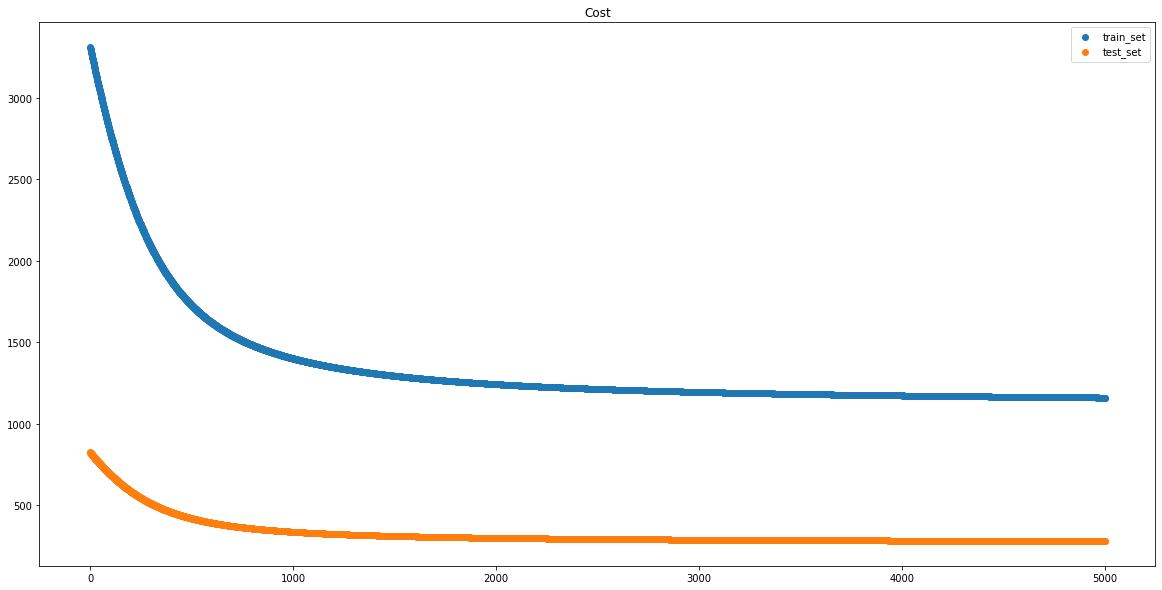

In [133]:
model = MyLogisticRegression()
EPOCHS = 5000
LR = 0.01
model.fit(x_train, y_train, x_test, y_test, EPOCHS, LR)

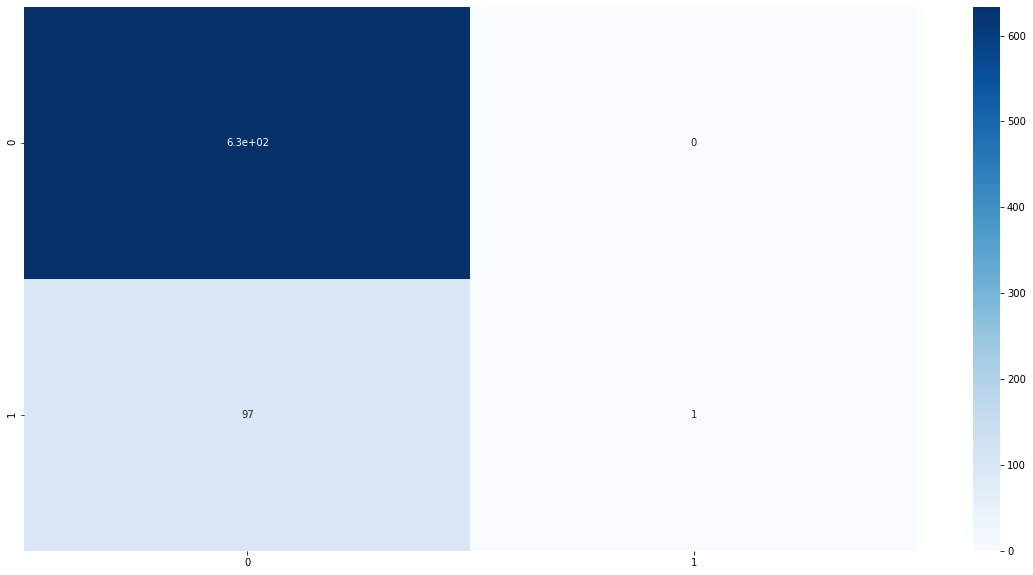

In [134]:
from sklearn import metrics
# tesing set
y_test_pred = model.predict(x_test)
test_conf = metrics.confusion_matrix(y_test, y_test_pred)
sn.heatmap(test_conf, annot=True, cmap='Blues')

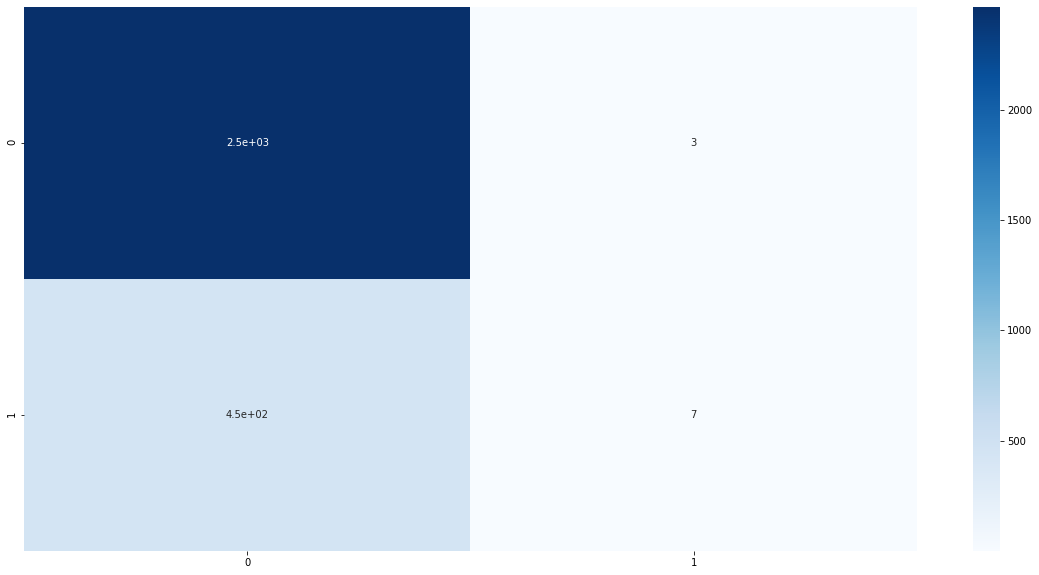

In [135]:
#training set
y_train_pred = model.predict(x_train)
train_conf = metrics.confusion_matrix(y_train, y_train_pred)
sn.heatmap(train_conf, annot=True, cmap='Blues')

# Logistic regression using SciKit Learn (for comparision)

In [136]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)

In [137]:
clf.score(x_test, y_test)

0.8549931600547196

In [138]:
clf.score(x_train, y_train)

0.8526495726495726